# Room Temperature

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

plt.style.use("seaborn-v0_8")


k_rw = 0.1
k_wo = 0.02
k_in = 0.5
T_out = 33


A = np.array([[-k_rw, k_rw],
              [k_rw, -(k_rw + k_wo)]])
B = np.array([[k_in, 0],
              [0, k_wo]])
C = np.array([[1, 0],
              [0, 1]])
D = np.array([[0, 0],
              [0, 0]])

SS1 = signal.StateSpace(A, B, C, D)

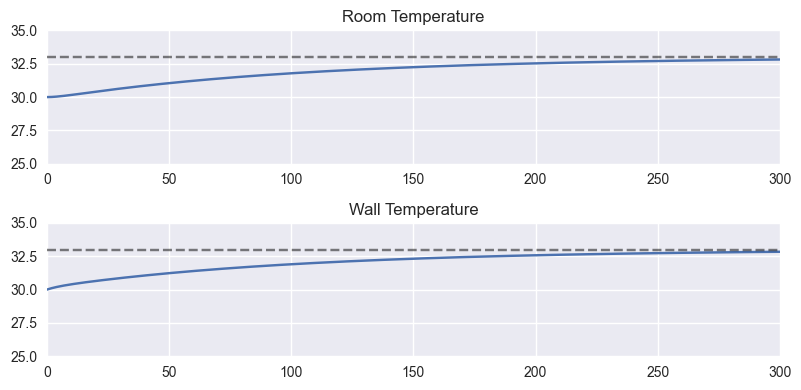

In [2]:
t = np.linspace(0, 300, 301)
u = np.array([np.zeros_like(t),
              np.ones_like(t) * T_out]).T

t, y, x = signal.lsim(SS1, u, t, X0=[30, 30])

fig, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].plot(t, x[:, 0])
ax[0].set_title('Room Temperature')
ax[0].set_xlim(0, 300)
ax[0].set_ylim(25, 35)
ax[0].axhline(y=T_out, color='k', linestyle='--', alpha=0.5)

ax[1].plot(t, x[:, 1])
ax[1].set_title('Wall Temperature')
ax[1].set_xlim(0, 300)
ax[1].set_ylim(25, 35)
ax[1].axhline(y=T_out, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Controlling Room Temperature with Full State Feedback

In [3]:
eigs = np.linalg.eigvals(A)
print(f"Eigenvalues: {eigs[0]:0.5f} and {eigs[1]:0.5f}")
# Eigenvalues: -0.00950 and -0.21050

Eigenvalues: -0.00950 and -0.21050


In [4]:
# Pole placement
P = np.array([-0.0095, -0.210])
fsf = signal.place_poles(A, B, P)
K = fsf.gain_matrix

print(f"Gain matrix: \n{K}")
# Gain matrix: 
# [[ 0.22   0.2  ]
#  [ 5.    -5.525]]

Gain matrix: 
[[ 0.22   0.2  ]
 [ 5.    -5.525]]


In [5]:
A_hat = A - np.dot(B, K)
eigs_hat = np.linalg.eigvals(A_hat)
print(f"The eigenvalues are: {eigs_hat[0]:0.5f} , {eigs_hat[1]:0.5f}")
# The eigenvalues are: -0.21000 , -0.00950

The eigenvalues are: -0.21000 , -0.00950


In [6]:
SS2 = signal.StateSpace(A_hat, B, C, D)

T_ref = 27
t = np.linspace(0, 300, 301)

u = np.array([
    np.ones_like(t) * T_ref,
    np.ones_like(t) * T_out
]).T

t, y, x = signal.lsim(SS2, u, t, X0=[30, 30])

kf = T_ref / x[-1, 0]
print(f"Feedforward gain: {kf:0.2f}")
SS3 = signal.StateSpace(A_hat, kf * B, C, D)
t, y, x = signal.lsim(SS3, u, t, X0=[30, 30])

Feedforward gain: 0.42


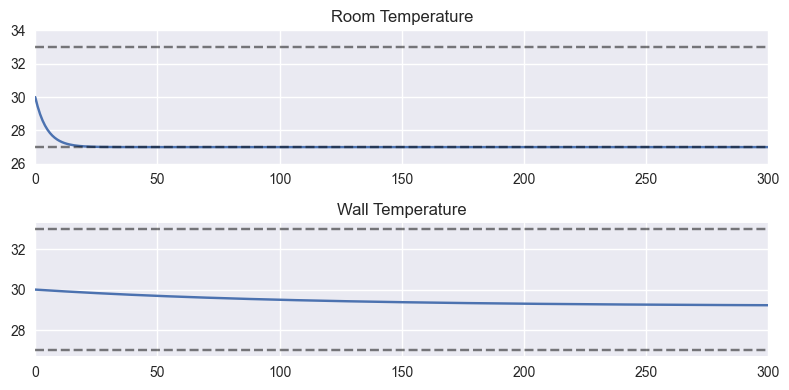

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].plot(t, x[:, 0])
ax[0].set_title('Room Temperature')
ax[0].set_xlim(0, 300)
ax[0].set_ylim(26, 34)
ax[0].axhline(y=T_out, color='k', linestyle='--', alpha=0.5)
ax[0].axhline(y=T_ref, color='k', linestyle='--', alpha=0.5)

ax[1].plot(t, x[:, 1])
ax[1].set_title('Wall Temperature')
ax[1].set_xlim(0, 300)
#ax[1].set_ylim(26, 34)
ax[1].axhline(y=T_out, color='k', linestyle='--', alpha=0.5)
ax[1].axhline(y=T_ref, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()